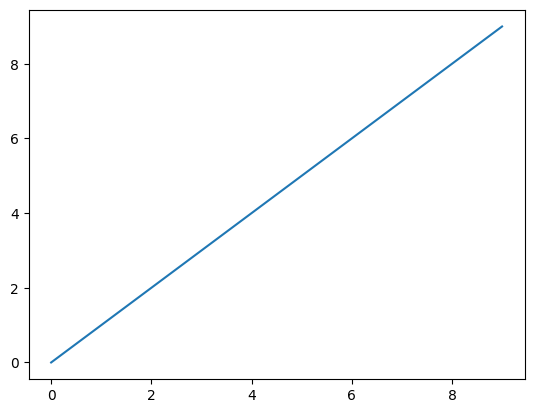

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.arange(10)
data

plt.plot(data)

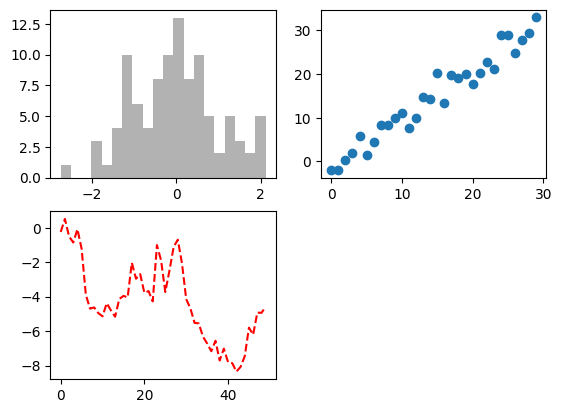

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(),color="red",linestyle="dashed")
ax1.hist(np.random.standard_normal(100), bins=20,color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))

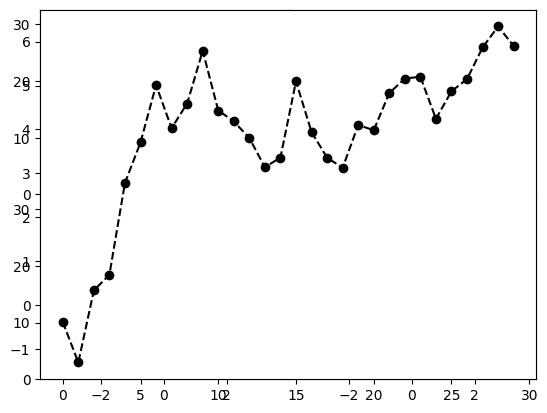

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
  for j in range(2):
    axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(),color="black",linestyle="dashed", marker="o")

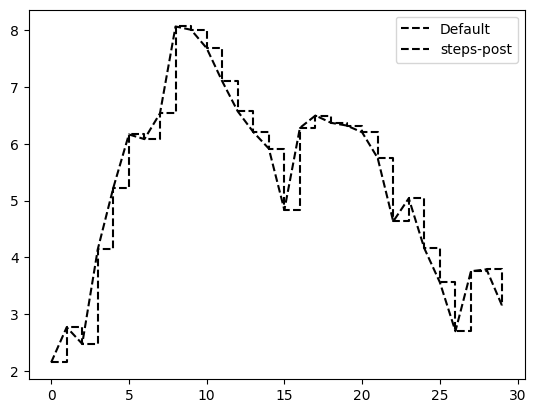

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed",label="Default");
ax.plot(data, color="black", linestyle="dashed",drawstyle="steps-post", label="steps-post")
ax.legend()

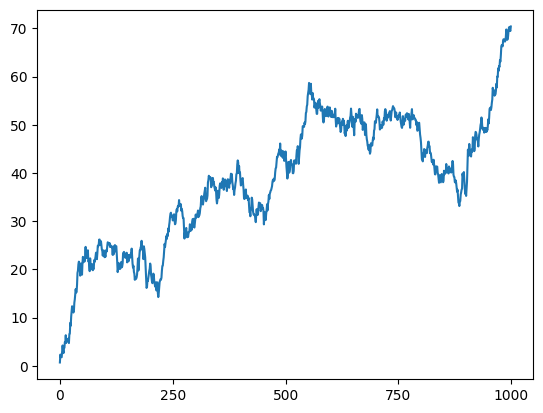

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
tick = ax.set_xticks([0,250,500,750,1000])

Text(0, 0.5, 'Mí primer matplotlib')

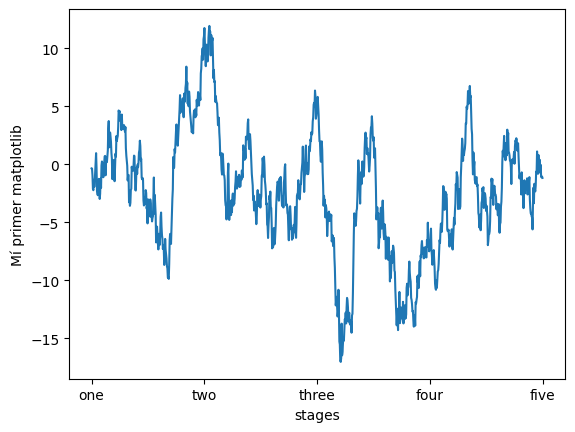

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
tick = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(["one","two","three","four","five"])
ax.set_xlabel("stages")
ax.set_ylabel("Mí primer matplotlib")

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/spx.csv'

response = requests.get(url)

with open('spx.csv', 'wb') as f:
  f.write(response.content)



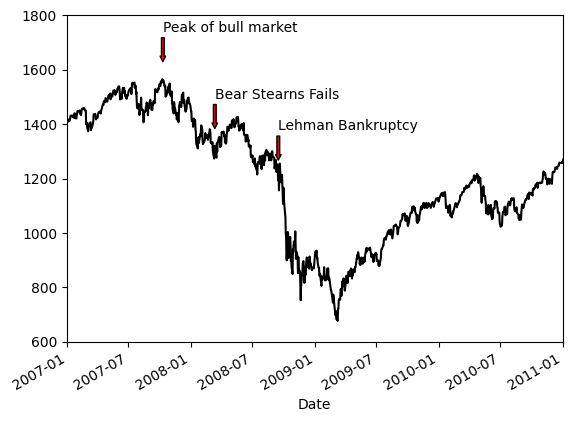

In [ ]:
import pandas as pd
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, color='black')

# Zoom 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy"),
]

for date, label in crisis_data:
  ax.annotate(label, xy=(date, spx.asof(date) + 75),
              xytext=(date, spx.asof(date) + 225),
              arrowprops=dict(facecolor='red', headwidth=4, width=2,
                              headlength=4),
              horizontalalignment='left', verticalalignment='top')

1. `ax.annotate()` agrega una anotación con flecha a un gráfico
2. `label` es el texto que aparecerá en la anotación
3. `xy=(date, spx.asof(date) + 75)` define el punto final de la flecha (el punto que se quiere señalar en el gráfico), ligeramente por encima del valor real
4. `xytext=(date, spx.asof(date) + 225)` define la posición del texto de la anotación, más arriba que la punta de la flecha
5. `arrowprops` configura las propiedades de la flecha: color negro, ancho y longitud de la punta
6. La alineación está configurada para que el texto quede alineado a la izquierda y en la parte superior del punto especificado

0    -0.409885
10    0.163200
20   -0.717890
30   -0.257788
40   -0.247556
50   -1.621504
60   -0.468552
70   -0.927288
80   -3.920670
90   -2.706225
dtype: float64


<Axes: >

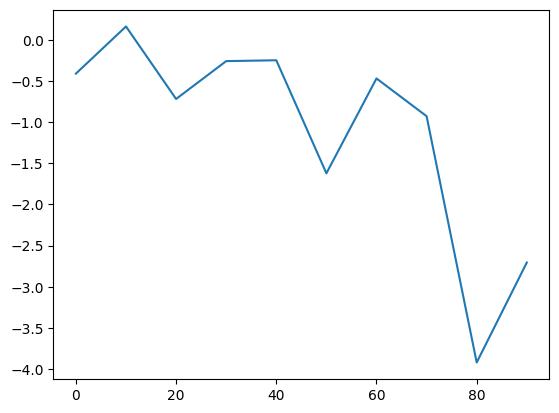

In [ ]:
s = pd.Series(np.random.standard_normal(10).cumsum(),index=np.arange(0, 100, 10))
print(s)
s.plot()

<Axes: >

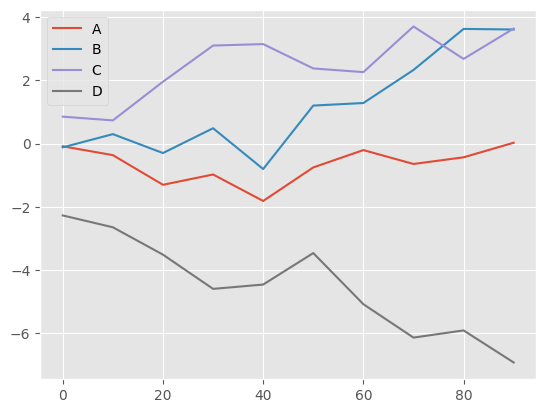

In [ ]:
df = pd.DataFrame(np.random.standard_normal((10,4)).cumsum(0),columns=["A","B","C","D"],index=np.arange(0, 100, 10))
plt.style.use("ggplot")
df.plot()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
survivor = titanic.pivot_table("survived",index="sex",columns="pclass",aggfunc="sum").unstack()
survivor

pclass  sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
dtype: int64

#26. Box Plot
###https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

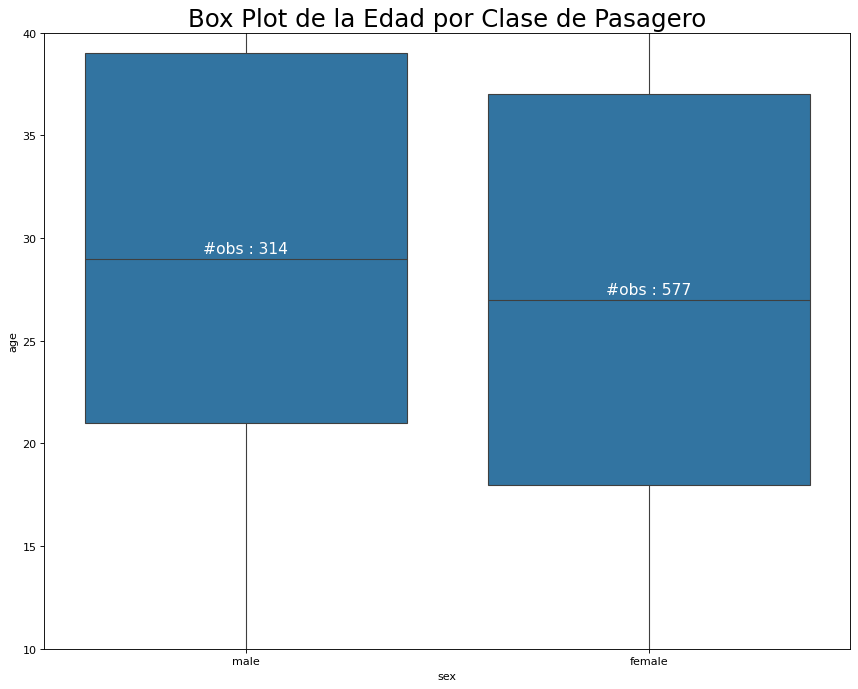

In [ ]:
# Draw Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='sex', y='age', data=titanic, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(titanic,group_col='sex',y='age')

# Decoration
plt.title('Box Plot de la Edad por Clase de Pasagero', fontsize=22)
plt.ylim(10, 40)
plt.show()

##Bar chart with gradients
###https://matplotlib.org/stable/gallery/lines_bars_and_markers/gradient_bar.html#sphx-glr-gallery-lines-bars-and-markers-gradient-bar-py

<ipython-input-18-aa4e3776048b>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic.groupby('age_group')['survived'].mean()


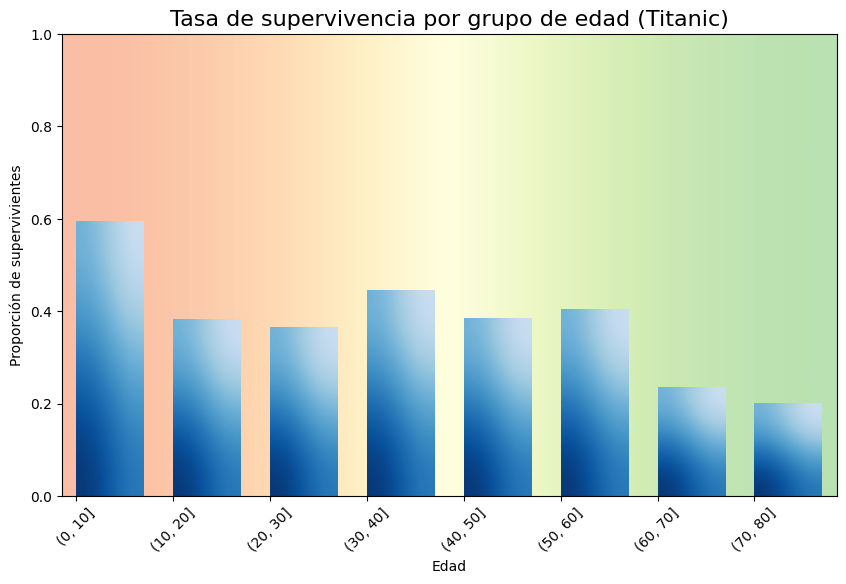

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#quitar valores null
titanic["age"].isnull()
titanic.dropna(subset=['age'], inplace=True)
titanic["age"].isnull()

titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
survival_rates = titanic.groupby('age_group')['survived'].mean()

# Função para criar gradiente de cor
def gradient_image(ax, direction=0.3, cmap_range=(0, 1), **kwargs):
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation='bicubic', clim=(0, 1),
                   aspect='auto', **kwargs)
    return im

# Função para criar barras com gradiente
def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(xlim=(0, len(survival_rates)), ylim=(0, 1))

# Imagem de fundo (gradiente)
gradient_image(ax, direction=1, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

# Gráfico de barras com gradiente
x = np.arange(len(survival_rates)) + 0.15
y = survival_rates.values
gradient_bar(ax, x, y, width=0.7)

# Adicionando rótulos
ax.set_xticks(x)
ax.set_xticklabels(survival_rates.index, rotation=45)
ax.set_title('Tasa de supervivencia por grupo de edad (Titanic)', fontsize=16)
ax.set_ylabel('Proporción de supervivientes')
ax.set_xlabel('Edad')
plt.show()

#Ejercicios de practicas


In [ ]:
Ejercicio 1
Esquema de la tabla Mundo:

nombre (varchar)
continente (varchar)
área (int)
población (int)
PIB (bigint)
nombre es la clave primaria (columna con valores únicos) de esta tabla. Cada fila de esta tabla proporciona información sobre el nombre de un país, el continente al que pertenece, su área, la población y su valor de PIB.

Un país es considerado grande si cumple al menos una de las siguientes condiciones:

Tiene un área de al menos tres millones (es decir, 3000000 km²).
Tiene una población de al menos veinticinco millones (es decir, 25000000).
Escribe una solución para encontrar el nombre, la población y el área de los países grandes. Devuelve la tabla de resultados en cualquier orden.

Ejemplo 1:
Entrada:

Tabla Mundo:

Afganistán, Asia, 652230 km², 25500100 habitantes, 20343000000 PIB
Albania, Europa, 28748 km², 2831741 habitantes, 12960000000 PIB
Argelia, África, 2381741 km², 37100000 habitantes, 188681000000 PIB
Andorra, Europa, 468 km², 78115 habitantes, 3712000000 PIB
Angola, África, 1246700 km², 20609294 habitantes, 100990000000 PIB
Salida:

Tabla de países grandes:

Afganistán, 25500100 habitantes, 652230 km²
Argelia, 37100000 habitantes, 2381741 km²

In [ ]:
import pandas as pd

world_data = {
    'name': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'],
    'continent': ['Asia', 'Europe', 'Africa', 'Europe', 'Africa'],
    'area': [652230, 28748, 2381741, 468, 1246700],
    'population': [25500100, 2831741, 37100000, 78115, 20609294],
    'gdp': [20343000000, 12960000000, 188681000000, 3712000000, 100990000000]
}

df = pd.DataFrame(world_data)
df

,name,continent,area,population,gdp
0,Afghanistan,Asia,652230,25500100,20343000000
1,Albania,Europe,28748,2831741,12960000000
2,Algeria,Africa,2381741,37100000,188681000000
3,Andorra,Europe,468,78115,3712000000
4,Angola,Africa,1246700,20609294,100990000000


In [ ]:
#Paises grandes

paises_grandes = df[(df["area"] >= 3000000) | (df["population"] >= 25000000)]
paises_grandes[["name", "population", "area"]]

,name,population,area
0,Afghanistan,25500100,652230
2,Algeria,37100000,2381741


In [ ]:
paises_grandes.loc[:, ["name", "population", "area"]]

,name,population,area
0,Afghanistan,25500100,652230
2,Algeria,37100000,2381741


#Ejercicio 2

In [ ]:
Esquema de la tabla Tweets:
tweet_id (int)
contenido (varchar)
tweet_id es la clave primaria (columna con valores únicos) de esta tabla. El contenido consiste en caracteres alfanuméricos, '!', o ' ' y no otros caracteres especiales. Esta tabla contiene todos los tweets en una aplicación de redes sociales.

Escribe una solución para encontrar los IDs de los tweets inválidos. Un tweet es inválido si el número de caracteres utilizados en el contenido del tweet es estrictamente mayor a 15.

Devuelve la tabla de resultados en cualquier orden.

Ejemplo 1:
Entrada:

Tabla Tweets:

Tweet ID: 1, Contenido: "Let us Code"
Tweet ID: 2, Contenido: "More than fifteen chars are here!"
Salida:

Tabla de tweets inválidos:

Tweet ID: 2
Explicación:

Tweet 1 tiene una longitud de 11 caracteres. Es un tweet válido.
Tweet 2 tiene una longitud de 33 caracteres. Es un tweet inválido.

In [ ]:
import pandas as pd

# Crear los datos para el DataFrame
data = {
    'tweet_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'content': [
        'Let us Code',                           # 11 caracteres
        'More than fifteen chars are here!',    # 33 caracteres
        'Hello World!',                         # 12 caracteres
        'Python is fun',                        # 12 caracteres
        'Data Science',                         # 12 caracteres
        'Pandas Library',                       # 13 caracteres
        'Machine Learning',                     # 16 caracteres
        'AI is the future',                     # 14 caracteres
        'Deep Learning',                        # 12 caracteres
        'Neural Networks',                      # 15 caracteres
        'Big Data Analysis',                    # 16 caracteres
        'Statistics',                           # 10 caracteres
        'Data Visualization',                   # 18 caracteres
        'Natural Language Processing',          # 26 caracteres
        'Advanced Analytics'                    # 17 caracteres
    ]
}

# Crear el DataFrame
tweets_df = pd.DataFrame(data)
tweets_df

,tweet_id,content
0,1,Let us Code
1,2,More than fifteen chars are here!
2,3,Hello World!
3,4,Python is fun
4,5,Data Science
5,6,Pandas Library
6,7,Machine Learning
7,8,AI is the future
8,9,Deep Learning
9,10,Neural Networks


In [ ]:

"""
lista_validar = ["valido" if len(i) > 15 else "invalido" for i in tweets_df["content"]]
lista_validar
tweets_df["validar"] = lista_validar
print(tweets_df)

for i in tweets_df.itertuples():
    if i.validar == "invalido":
        print(f'Tweet {i.tweet_id} tiene una longitud de {len(i.content)} caracteres. Es un tweet inválido.')
    else:
        print(f'Tweet {i.tweet_id} tiene una longitud de {len(i.content)} caracteres. Es un tweet válido.')"""
def invalid_tweets(tweets_df):
  invalid_tweets = tweets_df[tweets_df['content'].str.len() > 15]
  result = invalid_tweets[['tweet_id']]
  return result

invalid_tweets(tweets_df)

,tweet_id
1,2
6,7
7,8
10,11
12,13
13,14
14,15


#Ejercicio 03

In [ ]:
Encontrar el n-ésimo salario más alto
Estructura de la tabla Employee
Column Name	Type
id	int
salary	int
id es la clave primaria (columna con valores únicos) para esta tabla.
Cada fila de esta tabla contiene información sobre el salario de un empleado.
Tarea
Escribe una solución para encontrar el n-ésimo salario más alto de la tabla Employee. Si no existe el n-ésimo salario más alto, devuelve null.

Ejemplos
Ejemplo 1:
# Input:
Employee = [
    [1, 100],
    [2, 200],
    [3, 300]
]
n = 2

# Output:
nth_highest_salary(2)
# Resultado: 200

Ejemplo 2:
# Input:
Employee = [
    [1, 100]
]
n = 2

# Output:
nth_highest_salary(2)
# Resultado: None


SyntaxError: invalid syntax (<ipython-input-11-696f9f4f9762>, line 1)

In [ ]:
employee = [
    [1, 100],
    [2, 200],
    [3, 300],
    [4, 200],
]

df = pd.DataFrame(employee,columns=["id","salary"])
print(df)


def nth_highest_salary(df,n):

  if n <= len(df):
        return df.iloc[n - 1]
  else:
      return None

nth_highest_salary(df,4)


   id  salary
0   1     100
1   2     200
2   3     300
3   4     200


,3
id,4
salary,200


#Ejercicio 4

## Ejercicio 4
```

+-------------+---------+
| Nombre de columna | Tipo|
+-------------+---------+
| id          | int     |
| name        | varchar |
| department  | varchar |
| managerId   | int     |
+-------------+---------+
```
id es la clave primaria (columna con valores únicos) para esta tabla.
Cada fila de esta tabla indica el nombre de un empleado, su departamento y el id de su gerente.
Si managerId es nulo, entonces el empleado no tiene un gerente.
Ningún empleado será el gerente de sí mismo.

Escribe una solución para encontrar gerentes con al menos cinco subordinados directos.

Devuelve la tabla de resultados en cualquier orden.

El formato del resultado se muestra en el siguiente ejemplo.

Ejemplo 1:

Entrada:
Tabla Employee:
```
+-----+-------+------------+-----------+
| id  | name  | department | managerId |
+-----+-------+------------+-----------+
| 101 | John  | A          | null      |
| 102 | Dan   | A          | 101       |
| 103 | James | A          | 101       |
| 104 | Amy   | A          | 101       |
| 105 | Anne  | A          | 101       |
| 106 | Ron   | B          | 101       |
+-----+-------+------------+-----------+

Salida:
+------+
| name |
+------+
| John |
+------+
```

In [ ]:
# Crear los datos de prueba
data = {
    'id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
           201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
           301, 302, 303, 304, 305],
    'name': ['John', 'Dan', 'James', 'Amy', 'Anne', 'Ron', 'Lisa', 'Kai', 'Zoe', 'Eva',
             'Mary', 'Tom', 'Sam', 'Alex', 'Emma', 'Olivia', 'Liam', 'Noah', 'Ava', 'Mia',
             'David', 'Sarah', 'Michael', 'Emily', 'Chris'],
    'department': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
                   'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                   'C', 'C', 'C', 'C', 'C'],
    'managerId': [None, 101, 101, 101, 101, 101, 101, 101, 201, 201,
                  None, 201, 201, 201, 201, 201, 201, 301, 301, 301,
                  None, 301, 301, 301, 301]
}

# Crear el DataFrame
df = pd.DataFrame(data)
df

,id,name,department,managerId
0,101,John,A,NaN
1,102,Dan,A,101.0
2,103,James,A,101.0
3,104,Amy,A,101.0
4,105,Anne,A,101.0
5,106,Ron,A,101.0
6,107,Lisa,A,101.0
7,108,Kai,A,101.0
8,109,Zoe,A,201.0
9,110,Eva,A,201.0


In [ ]:
manager = df.groupby("managerId").size()
print(manager)
gerentes_con_subordinados = manager [manager  >= 5]
print(gerentes_con_subordinados)
gerentes = df[df['id'].isin(gerentes_con_subordinadosr.index)][['name']]
print(gerentes)

import pandas as pd

def find_managers(employee: pd.DataFrame) -> pd.DataFrame:
    required_managers = (
        employee
        .groupby('managerId', as_index=False)
        .agg(reporting=('id', 'count'))
        .query('reporting >= 5')
    )['managerId']

    return employee.loc[employee['id'].isin(required_managers), ['name']]


managerId
101.0    7
201.0    8
301.0    7
dtype: int64
managerId
101.0    7
201.0    8
301.0    7
dtype: int64
     name
0    John
10   Mary
20  David


In [ ]:
+--------------+---------+
| Nombre de columna | Tipo |
+--------------+---------+
| fecha_de_venta | fecha |
| producto | varchar |
+--------------+---------+
No existe una clave principal (columna con valores únicos) para esta tabla. Podría contener duplicados.
Cada fila de esta tabla contiene el nombre del producto y la fecha en que se vendió en un mercado.


Escribe una solución para encontrar para cada fecha el número de diferentes productos vendidos y sus nombres.

Los nombres de los productos vendidos para cada fecha deben ordenarse lexicográficamente.

Devuelve la tabla de resultados ordenada por sell_date.

El formato del resultado se muestra en el siguiente ejemplo.



Ejemplo 1:

Aporte:
Mesa de actividades:
+------------+------------+
| fecha_de_venta | producto |
+------------+------------+
| 30/05/2020 | Auriculares |
| 2020-06-01 | Lápiz |
| 2020-06-02 | Mascarilla |
| 30/05/2020 | Baloncesto |
| 2020-06-01 | Biblia |
| 2020-06-02 | Mascarilla |
| 30/05/2020 | Camiseta |
+------------+------------+
Producción:
+------------+----------+------------------------------+
| fecha_de_venta | núm_vendidos | productos |
+------------+----------+------------------------------+
| 30/05/2020 | 3 | Baloncesto, Auriculares, Camiseta |
| 2020-06-01 | 2 | Biblia, Lápiz |
| 2020-06-02 | 1 | Máscara |
+------------+----------+------------------------------+
Explicación:
Para el 30/05/2020, los artículos vendidos fueron (auriculares, baloncesto, camiseta), los clasificamos lexicográficamente y los separamos con una coma.
Para el 2020-06-01, los artículos vendidos fueron (Lápiz, Biblia), los clasificamos lexicográficamente y los separamos con una coma.
Para el 2020-06-02, el artículo vendido es (Mascarilla), simplemente lo devolvemos.

In [ ]:
data = {
    'sell_date': [
        '2020-05-30', '2020-06-01', '2020-06-02', '2020-05-30',
        '2020-06-01', '2020-06-02', '2020-05-30',
        '2020-06-03', '2020-06-03', '2020-06-04', '2020-06-04', '2020-06-04'
    ],
    'product': [
        'Headphone', 'Pencil', 'Mask', 'Basketball',
        'Bible', 'Mask', 'T-Shirt',
        'Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Keyboard'
    ]
}

df = pd.DataFrame(data)
df

,sell_date,product
0,2020-05-30,Headphone
1,2020-06-01,Pencil
2,2020-06-02,Mask
3,2020-05-30,Basketball
4,2020-06-01,Bible
5,2020-06-02,Mask
6,2020-05-30,T-Shirt
7,2020-06-03,Laptop
8,2020-06-03,Mouse
9,2020-06-04,Keyboard


In [ ]:
agrupado = df.groupby("sell_date").agg(num_sold=('product', 'count'),Product=('product', lambda x: ', '.join(sorted(x)))).reset_index()
agrupado

,sell_date,num_sold,Product
0,2020-05-30,3,"Basketball, Headphone, T-Shirt"
1,2020-06-01,2,"Bible, Pencil"
2,2020-06-02,2,"Mask, Mask"
3,2020-06-03,2,"Laptop, Mouse"
4,2020-06-04,3,"Keyboard, Keyboard, Monitor"


Recyclable and Low Fat Products

In [ ]:
import pandas as pd
data = [['0', 'Y', 'N'], ['1', 'Y', 'Y'], ['2', 'N', 'Y'], ['3', 'Y', 'Y'], ['4', 'N', 'N']]
products = pd.DataFrame(data, columns=['product_id', 'low_fats', 'recyclable']).astype({'product_id':'int64', 'low_fats':'category', 'recyclable':'category'})
products

,product_id,low_fats,recyclable
0,0,Y,N
1,1,Y,Y
2,2,N,Y
3,3,Y,Y
4,4,N,N


In [ ]:
def find_products(products: pd.DataFrame) -> pd.DataFrame:
    return products[(products["low_fats"] == "Y")&(products["recyclable"] == "Y")][["product_id"]]

find_products(products)

,product_id
1,1
3,3


Customers Who Never Order

In [ ]:
data = [[1, 'Joe'], [2, 'Henry'], [3, 'Sam'], [4, 'Max']]
customers = pd.DataFrame(data, columns=['id', 'name']).astype({'id':'Int64', 'name':'object'})
data = [[1, 3], [2, 1]]
orders = pd.DataFrame(data, columns=['id', 'customerId']).astype({'id':'Int64', 'customerId':'Int64'})
print(customers)
print(orders)

   id   name
0   1    Joe
1   2  Henry
2   3    Sam
3   4    Max
   id  customerId
0   1           3
1   2           1


In [ ]:

def find_customers(customers: pd.DataFrame, orders: pd.DataFrame) -> pd.DataFrame:
    df = customers[~customers["id"].isin(orders["customerId"])]
    df2 = df.rename(columns={"name":"Customers"})
    df2 = df2.drop("id",axis=1)
    return df2
find_customers(customers,orders)

,Customers
1,Henry
3,Max


Article Views I

In [ ]:
data = [[1, 3, 5, '2019-08-01'], [1, 3, 6, '2019-08-02'], [2, 7, 7, '2019-08-01'], [2, 7, 6, '2019-08-02'], [4, 7, 1, '2019-07-22'], [3, 4, 4, '2019-07-21'], [3, 4, 4, '2019-07-21']]
views = pd.DataFrame(data, columns=['article_id', 'author_id', 'viewer_id', 'view_date']).astype({'article_id':'Int64', 'author_id':'Int64', 'viewer_id':'Int64', 'view_date':'datetime64[ns]'})

print(data)
print("-----------")
print(views)

[[1, 3, 5, '2019-08-01'], [1, 3, 6, '2019-08-02'], [2, 7, 7, '2019-08-01'], [2, 7, 6, '2019-08-02'], [4, 7, 1, '2019-07-22'], [3, 4, 4, '2019-07-21'], [3, 4, 4, '2019-07-21']]
-----------
   article_id  author_id  viewer_id  view_date
0           1          3          5 2019-08-01
1           1          3          6 2019-08-02
2           2          7          7 2019-08-01
3           2          7          6 2019-08-02
4           4          7          1 2019-07-22
5           3          4          4 2019-07-21
6           3          4          4 2019-07-21


In [ ]:
df = views[(views["author_id"] == views["viewer_id"])].rename(columns={"author_id":"id"}).sort_values("id").drop_duplicates(subset=["id"])[["id"]]
df

,id
5,4
2,7


Calculate Special Bonus

In [ ]:
data = [[2, 'Meir', 3000], [3, 'Michael', 3800], [7, 'Addilyn', 7400], [8, 'Juan', 6100], [9, 'Kannon', 7700]]
employees = pd.DataFrame(data, columns=['employee_id', 'name', 'salary']).astype({'employee_id':'int64', 'name':'object', 'salary':'int64'})

print(data)
print("-------------------")
print(employees)

[[2, 'Meir', 3000], [3, 'Michael', 3800], [7, 'Addilyn', 7400], [8, 'Juan', 6100], [9, 'Kannon', 7700]]
-------------------
   employee_id     name  salary
0            2     Meir    3000
1            3  Michael    3800
2            7  Addilyn    7400
3            8     Juan    6100
4            9   Kannon    7700


In [ ]:

condition = ((employees["name"].str[0] != "M") & (employees["employee_id"] % 2 != 0))
employees['salary'] = employees['salary'].where(condition, 0)
employees.rename(columns={"salary":"bonus"}).sort_values("employee_id")[["employee_id","bonus"]]


,employee_id,bonus
0,2,0
1,3,0
2,7,7400
3,8,0
4,9,7700


 Fix Names in a Table

In [ ]:
data = [[1, 'aLice'], [2, 'bOB']]
users = pd.DataFrame(data, columns=['user_id', 'name']).astype({'user_id':'Int64', 'name':'object'})
users

,user_id,name
0,1,aLice
1,2,bOB


In [ ]:
users["name"] = users["name"].str.capitalize()
users

,user_id,name
0,1,Alice
1,2,Bob


#Find Users With Valid E-Mails

In [ ]:
import pandas as pd
data = [[1, 'Winston', 'winston@leetcode.com'], [2, 'Jonathan', 'jonathanisgreat'], [3, 'Annabelle', 'bella-@leetcode.com'], [4, 'Sally', 'sally.come@leetcode.com'], [5, 'Marwan', 'quarz#2020@leetcode.com'], [6, 'David', 'david69@gmail.com'], [7, 'Shapiro', '.shapo@leetcode.com']]
users = pd.DataFrame(data, columns=['user_id', 'name', 'mail']).astype({'user_id':'int64', 'name':'object', 'mail':'object'})

users

,user_id,name,mail
0,1,Winston,winston@leetcode.com
1,2,Jonathan,jonathanisgreat
2,3,Annabelle,bella-@leetcode.com
3,4,Sally,sally.come@leetcode.com
4,5,Marwan,quarz#2020@leetcode.com
5,6,David,david69@gmail.com
6,7,Shapiro,.shapo@leetcode.com


In [ ]:
import re
condicional = users[users["mail"].str.match(r'^[a-zA-Z][a-zA-Z0-9_.-]*@leetcode\.com$')]
condicional


,user_id,name,mail
0,1,Winston,winston@leetcode.com
2,3,Annabelle,bella-@leetcode.com
3,4,Sally,sally.come@leetcode.com


#Nth Highest Salary

In [ ]:
import pandas as pd
data = [[1, 100], [2, 200], [3, 300]]
employee = pd.DataFrame(data, columns=['Id', 'Salary']).astype({'Id':'Int64', 'Salary':'Int64'})
employee


,Id,Salary
0,1,100
1,2,200
2,3,300


In [ ]:
n =3
print(type(employee))
if n <= len(employee):
  print(employee.iloc[n-1])
else:
  None

if n <= len(employee):
    df = pd.DataFrame(employee)
    print(df[df["Id"] == n].rename(columns={"Salary":f"getNthHighestSalary({n})"})[[f"getNthHighestSalary({n})"]])
else:
    print(pd.DataFrame([{f"getNthHighestSalary({n})": None}]))


<class 'pandas.core.frame.DataFrame'>
Id          3
Salary    300
Name: 2, dtype: Int64
   getNthHighestSalary(3)
2                     300


#Datos Bitly de 1.USA.gov

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/bitly_usagov/example.txt'

response = requests.get(url)
output_file = 'example.txt'

if response.status_code == 200:
  with open(output_file, 'w') as f:
    f.write(response.text)
  print(f'Descarga exitosa')
else:
  print("Fallo en la descarga")

Descarga exitosa


In [ ]:
import json
import os

with open(output_file) as f:
  records = [json.loads(line) for line in f]

records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [ ]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [ ]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[0:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [ ]:
def get_counts(sequence):
  counts = {}
  for x in sequence:
    if x in counts:
      counts[x] += 1
    else:
      counts[x] = 1
  return counts

get_counts(time_zones)

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [ ]:
from collections import defaultdict
def get_counts2(sequence):
  counts = defaultdict(int) # los valores se inicializan a 0
  for x in sequence:
    counts[x] += 1
  return counts


counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [ ]:
len(time_zones)

3440

In [ ]:
def top_counts(count_dict, n=10):
  value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
  value_key_pairs.sort()
  return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [ ]:
import pandas as pd
frame = pd.DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [ ]:
frame["tz"].head()

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York


In [ ]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


In [ ]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()


,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


<Axes: ylabel='tz'>

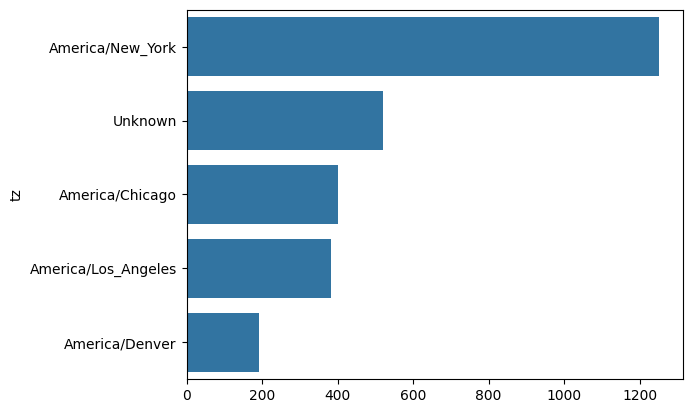

In [ ]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [ ]:
print(frame["a"][1])
print(frame["a"][50])


print(frame["a"][51][:50]) # línea larga

GoogleMaps/RochesterNY
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9


In [ ]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head()

,0
0,Mozilla/5.0
1,GoogleMaps/RochesterNY
2,Mozilla/4.0
3,Mozilla/5.0
4,Mozilla/5.0


In [ ]:
results.value_counts().head(8)

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4


In [ ]:
cframe = frame[frame["a"].notna()].copy()

In [ ]:
cframe.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [ ]:
import numpy as np
cframe['os'] = np.where(cframe['a'].str.contains("Windows"), "Windows", "Not Windows")
cframe['os'].head()

,os
0,Windows
1,Not Windows
2,Windows
3,Not Windows
4,Windows


In [ ]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


ValueError: No axis named colums for object type DataFrame

In [ ]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [ ]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [ ]:
agg_counts.sum(axis="columns").nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


In [ ]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

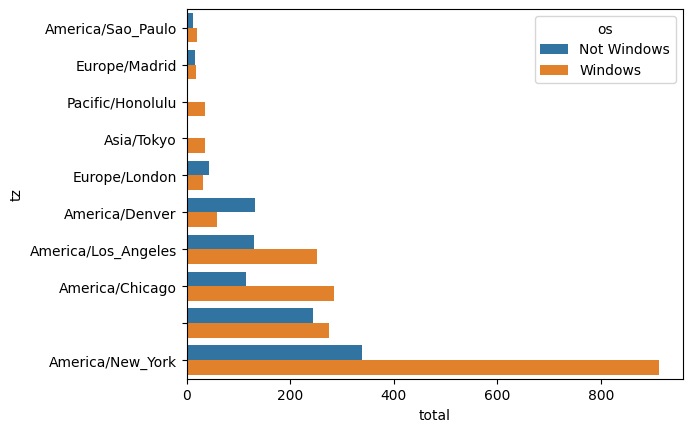

In [ ]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

<ipython-input-61-49bca55aee73>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

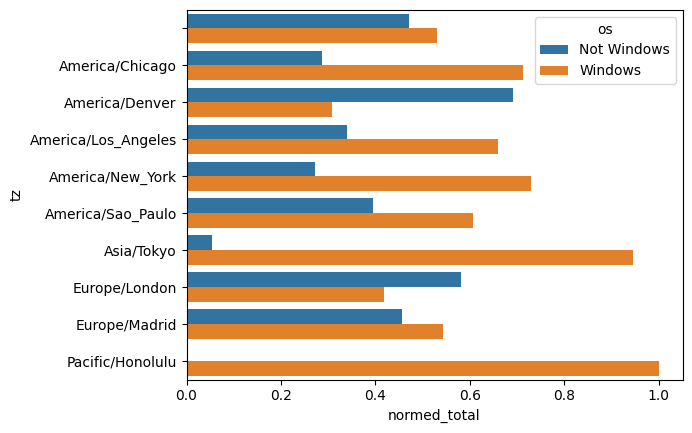

In [ ]:
def norm_total(group):
  group["normed_total"] = group["total"] / group["total"].sum()
  return group
results = count_subset.groupby("tz").apply(norm_total)

sns.barplot(x="normed_total", y="tz", hue="os", data=results)

In [ ]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")
results2

,total
0,0.393939
1,0.606061
2,0.457143
3,0.542857
4,0.000000
5,1.000000
6,0.054054
7,0.945946
8,0.581081
9,0.418919


#Conjunto de datos MovieLens 1M

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/'
files = ['movies.dat', 'ratings.dat', 'users.dat']

for archivo in files:

  url1 = url+archivo

  response = requests.get(url1)

  if response.status_code == 200:

    with open(archivo, 'wb') as f:
      f.write(response.content)
    print(f'Descarga exitosa: {archivo}')
  else:
    print(f'Error en la descarga: {archivo}')

Descarga exitosa: movies.dat
Descarga exitosa: ratings.dat
Descarga exitosa: users.dat


In [ ]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("users.dat", sep="::",
header=None, names=unames, engine="python")
rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("ratings.dat", sep="::",
header=None, names=rnames, engine="python")
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("movies.dat", sep="::",
header=None, names=mnames, engine="python")

users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [ ]:
mean_ratings = data.pivot_table("rating", index="title",columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [ ]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()

,0
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199


In [ ]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [ ]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [ ]:
top_female_ratings = mean_ratings.sort_values("F",ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [ ]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [ ]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [ ]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

,rating
title,
"'burbs, The (1989)",1.107760
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717
12 Angry Men (1957),0.812731


In [ ]:
rating_std_by_title.sort_values(ascending=False)[:10]

,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


In [ ]:
movies["genres"].head()

,genres
0,Animation|Children's|Comedy
1,Adventure|Children's|Fantasy
2,Comedy|Romance
3,Comedy|Drama
4,Comedy


In [ ]:
movies["genres"].head().str.split("|")

,genres
0,"[Animation, Children's, Comedy]"
1,"[Adventure, Children's, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama]"
4,[Comedy]


In [ ]:
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [ ]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [ ]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings),users)
ratings_with_genre.iloc[0]

,0
movie_id,1
title,Toy Story (1995)
genre,Animation
user_id,1
rating,5
timestamp,978824268
gender,F
age,1
occupation,10
zip,48067


In [ ]:
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])["rating"].mean().unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


#Nombres de bebés de Estados Unidos entre 1880 y 2010

In [ ]:
! mkdir babynames

In [ ]:
base_url = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/'
start_year = 1880
end_year = 2010

for year in range(start_year, end_year + 1):
  filename = f'yob{year}.txt'
  url = base_url + filename
  output_path = f'babynames/{filename}'

  response = requests.get(url)

  if response.status_code == 200:
    with open(output_path, 'wb') as f:
      f.write(response.content)
    print(f'Descarga exitosa de {filename}')
  else:
    print(f"Fallo al descargar {filename}")

Descarga exitosa de yob1880.txt
Descarga exitosa de yob1881.txt
Descarga exitosa de yob1882.txt
Descarga exitosa de yob1883.txt
Descarga exitosa de yob1884.txt
Descarga exitosa de yob1885.txt
Descarga exitosa de yob1886.txt
Descarga exitosa de yob1887.txt
Descarga exitosa de yob1888.txt
Descarga exitosa de yob1889.txt
Descarga exitosa de yob1890.txt
Descarga exitosa de yob1891.txt
Descarga exitosa de yob1892.txt
Descarga exitosa de yob1893.txt
Descarga exitosa de yob1894.txt
Descarga exitosa de yob1895.txt
Descarga exitosa de yob1896.txt
Descarga exitosa de yob1897.txt
Descarga exitosa de yob1898.txt
Descarga exitosa de yob1899.txt
Descarga exitosa de yob1900.txt
Descarga exitosa de yob1901.txt
Descarga exitosa de yob1902.txt
Descarga exitosa de yob1903.txt
Descarga exitosa de yob1904.txt
Descarga exitosa de yob1905.txt
Descarga exitosa de yob1906.txt
Descarga exitosa de yob1907.txt
Descarga exitosa de yob1908.txt
Descarga exitosa de yob1909.txt
Descarga exitosa de yob1910.txt
Descarga

In [ ]:
pieces = []
for year in range(1880, 2011):
  path = f'babynames/yob{year}.txt'
  frame = pd.read_csv(path, names=["name", "sex", "births"])
  # Añade una columna para el año
  frame["year"] = year
  pieces.append(frame)
# Concatena todo en un solo dataframe
names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
from functools import total_ordering
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)
total_births

<ipython-input-175-67783758dd70>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)


sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

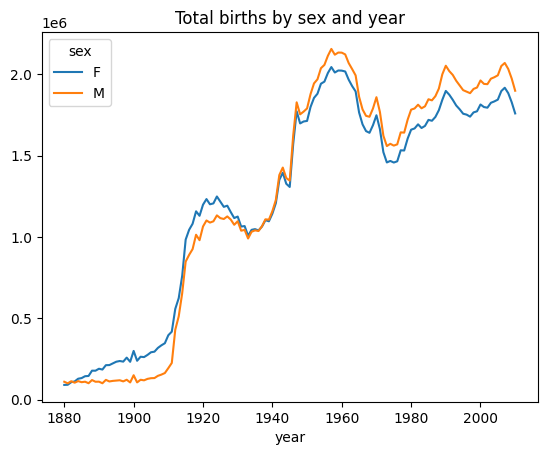

In [ ]:
total_births.plot(title="Total births by sex and year")

In [ ]:
def add_prop(group):
  group['prop'] = group['births'] / group['births'].sum()
  return group
names = names.groupby(['year','sex'],  group_keys=False).apply(add_prop)
names

<ipython-input-177-fb72191ed4bb>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year','sex'],  group_keys=False).apply(add_prop)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [ ]:
names.groupby(['year','sex'])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [ ]:
def get_top1000(group):
  return group.sort_values("births", ascending=False)[:1000]
Igrouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.head()

NameError: name 'names' is not defined